In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [25]:
optim_types = ['catoni', 'mom', 'pro', 'reg', 'trunc_lin', 'trunc']
# optim_types = ['catoni', 'pro', 'reg', 'trunc_lin', 'trunc']
# optim_types = ['mom', '']
noise_type = 'pareto'
scale = 1.0
p = 1.5
samples = 10000
dim = 5
n_seeds = 5

error_list = [[] for _ in range(len(optim_types))]
for optim_idx, optim_type in enumerate(optim_types):
#     for seed in [1,2,3,4,6,7,8,9,10]:
    for seed in range(1,n_seeds+1):
        filename = 'estimation_results/{:}-p{:.2f}-s{:.2f}-dim{:d}-size{:d}-{:}-seed{:d}.npy'.format(noise_type,p,scale,dim,samples,optim_type,seed)
        with open(filename,'rb') as f:
            data_per_seed=np.load(f)
            error_list[optim_idx].append(data_per_seed['error_list'])

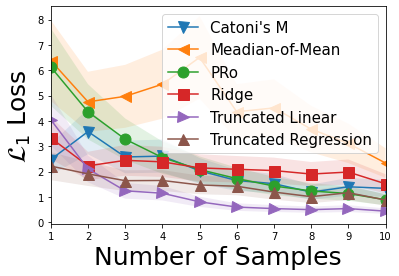

In [26]:
x_list = range(1,10+1)

for optim_idx, optim_type in enumerate(optim_types):
    algo_label = optim_type
    mean_list = np.mean(error_list[optim_idx],axis=0)
#     print(optim_type)
#     print(mean_list.shape)
    std_list = np.mean(error_list[optim_idx],axis=0)
    a = 0.25
    if 'catoni' in optim_types[optim_idx]:
        algo_label = 'Catoni\'s M'
        m='v'
    elif 'reg' in optim_types[optim_idx]:
        algo_label = 'Ridge'
        m='s'
    elif 'trunc_lin' in optim_types[optim_idx]:
        algo_label = 'Truncated Linear'
        m='>'
    elif 'trunc' in optim_types[optim_idx]:
        algo_label = 'Truncated Regression'
        m='^'
    elif 'pro' in optim_types[optim_idx]:
        algo_label = 'PRo'
        m='o'
    elif 'mom' in optim_types[optim_idx]:
        algo_label = 'Meadian-of-Mean'
        m='<'
#     elif 'RobustUCB-Truncated-Mean' in algos_name[algo_type_idx]:
#         algo_label = 'RobustUCB'
#         m='<'
#     elif 'DSEE' in algos_name[algo_type_idx]:
#         algo_label = 'DSEE'
#         m='>'
#     elif 'GSR' in algos_name[algo_type_idx]:
#         algo_label = 'GSR'
#         m='>'
        
    best_opt_idx = np.argmin(mean_list[:,-1])
    init_idx = 0
    plt.fill_between(x_list[init_idx:],mean_list[best_opt_idx][init_idx:]-a*std_list[best_opt_idx][init_idx:],mean_list[best_opt_idx][init_idx:]+a*std_list[best_opt_idx][init_idx:],alpha=0.13)
    plt.plot(x_list[init_idx:],mean_list[best_opt_idx][init_idx:],label=algo_label, marker=m, ms=11, markevery=1)

plt.xlim([np.min(x_list),np.max(x_list)])
plt.xlabel("Number of Samples",fontsize=25)
plt.ylabel("$\mathcal{L}_{1}$ Loss",fontsize=25)
plt.legend(prop={'size' : 15})
plt.show()